In [121]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

## Introduction

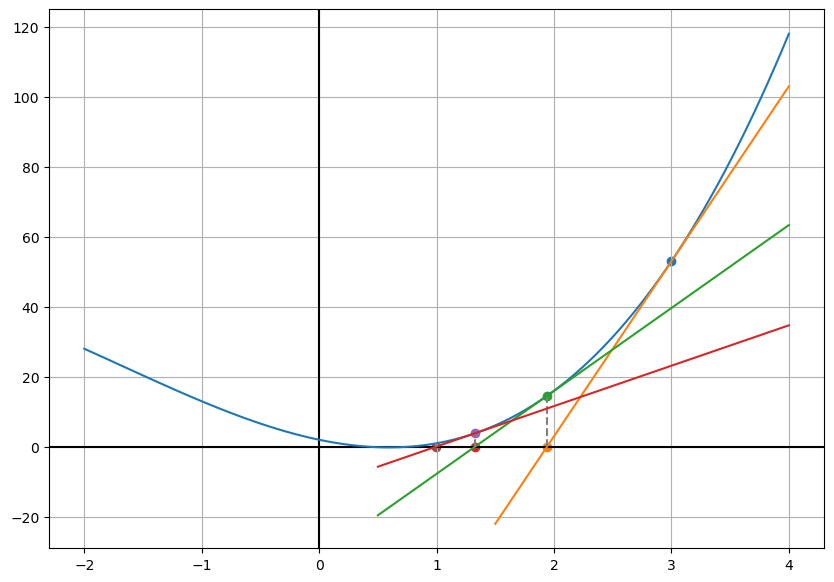

In [122]:
#Function
y_s = lambda x: x**3 + 5*x**2 - 7*x + 2
#Derivative
dy_s = lambda x: 3*x**2 + 10*x - 7

#Rnage to draw tangent
tangent_x = np.linspace(1.5,4, 100)

#tangent line function m, b returning function
tangent = lambda point : (dy_s(point),-(dy_s(point)*point - y_s(point)))

#Background plot
plt.figure(figsize=(10,7))
plt.grid()
plt.axhline(c='black')
plt.axvline(c='black')

#Function
values = np.linspace(-2,4, 100)
plt.plot(values, y_s(values))

#Random point (change if you like)
point_0 = 3

#Repeat
m_0, b_0 = tangent(point_0)
plt.scatter(point_0, y_s(point_0))
plt.plot(tangent_x, m_0 * tangent_x + b_0)
point_1 = -(b_0/m_0)
plt.scatter(point_1,0)
plt.vlines(point_1, ymin=0, ymax=(y_s(point_1)), linestyles='dashed', colors='gray')

#Rnage to draw tangent
tangent_x = np.linspace(0.5,4, 100)

#Repeat
m_1, b_1 = tangent(point_1)
plt.scatter(point_1, y_s(point_1))
plt.plot(tangent_x, m_1 * tangent_x + b_1)
point_2 = -(b_1/m_1)
plt.scatter(point_2,0)
plt.vlines(point_2, ymin=0, ymax=(y_s(point_2)), linestyles='dashed', colors='gray')

#Repeat
m_2, b_2 = tangent(point_2)
plt.scatter(point_2, y_s(point_2))
plt.plot(tangent_x, m_2 * tangent_x + b_2)
point_3 = -(b_2/m_2)
plt.scatter(point_3,0)
plt.vlines(point_3, ymin=0, ymax=(y_s(point_3)), linestyles='dashed', colors='gray')

plt.show()

 Although not widely used in Neural Networks Newton's method is a faster method to find the roots of a function, where for Neural networks we can use it to find the roots of the derivative function to ultimately reduce the loss.

$$
x_{k+1} = x_k- {f(x_k) \over f'(x_k)}
$$

# One_variable

To illustrate this let's use the function of $f(x) = e^x - ln(x)$
<br>
The first dertivative will be $f'(x) = e^x - {1 \over x}$
<br>
The second derivative will be $f''(x) = e^x + {1 \over x^2}$
<br>
So, It the equation for this particualr function can be summarized to:
$$ 
x_{k+1} = x_k - {x_k^2e^x_k - x_k \over x_k^2ex_k + 1}

In [210]:
def f(x):
    return np.exp(x) - np.log(x)

In [64]:
range_ = (0.1, 1.5)
x = np.linspace(*range_, 100, )
y = f(x)

In [68]:
def newton(point):
    e_term = np.square(point) * np.exp(point)
    return point - (e_term - point)/(e_term + 1)

In [69]:
num_iters = 10

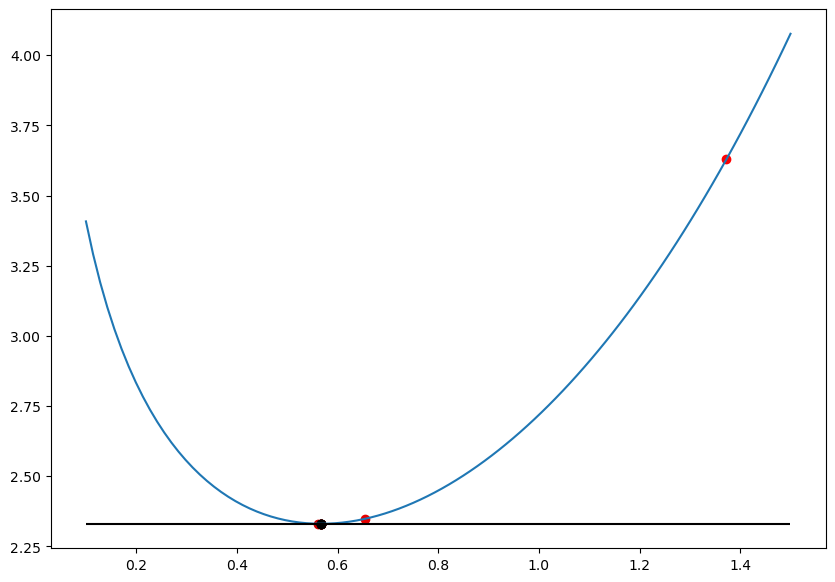

In [77]:
# plot the path of descent
point = np.random.choice(x)
point_y = f(point)

plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.hlines(np.min(y), *range_, colors = [(255,0,0)])
plt.scatter(point,point_y, c=[(1,0,0)])
for i in range(num_iters):
    point = newton(point)
    point_y = f(point)
    plt.scatter(point,point_y, c=[((num_iters-i - 1)/num_iters,0,0)])

# Two - Variables or more

$$\begin{bmatrix}x_{k+1} \\ y_{k+1}\end{bmatrix} = \begin{bmatrix}x_k \\ y_k\end{bmatrix} - 
H^{-1}\left(x_k, y_k\right) . \nabla f\left(x_k, y_k\right)$$

where $H^{-1}\left(x_k, y_k\right)$ is an inverse of the Hessian matrix of $f(x,y)$ at point $(x_k, y_k)$ 

To illustrate this let's use the function of $f(x,y) = z = x^4 +y^4\ +y + x$
<br>
<br>
The first derivative  w.r.t  x will be $f_x(x,y) = 4x^3 + 1$
<br>
<br>
The first derivative  w.r.t  y will be $f_y(x,y) = 4y^3 + 1$
<br>
<br>
So the complete gradient will be 
$$
\nabla f(x,y) = \begin{bmatrix}4x^3 + 1 \\ 4y^3 + 1\end{bmatrix}
$$

The second derivative will be a Hessian matrix of size n*n where n is the number of variables, 2 in this case
<br>
<br>
The second derivative of $f_x(x,y)$ w.r.t  $x$ will be 
$f_{xx}(x,y) = 12x^2 - 6y  + 6x 
$ 
<br>
<br>
The second derivative of $f_x(x,y)$ w.r.t  $x$ will be 
$f_{yx}(x,y) = -6x
$
<br>
<br>
The second derivative of $f_y(x,y)$ w.r.t  $x$ will be 
$f_{xy}(x,y) = -6x 
$ 

> $f_{yx}(x,y)$ and $f_{xy}(x,y)$ are equal because :
> $${\partial f^2 \over {\partial x \partial y}} = {\partial f^2 \over {\partial y \partial x}} $$

The second derivative of $f_x(x,y)$ w.r.t  $x$ will be 
$f_{xx}(x,y) = 12y^2 
$ 
<br>

So, It the Hessian matrix for this particular function will be:
$$ 
H(x,y) = \begin{bmatrix}12x^2  &  0 \\ 0 & 12y^2 \end{bmatrix}
$$

The inverse will be :
$$
H^{-1}(x,y) = {1 \over 144x^2y^2} \begin{bmatrix} 12y^2  & 0\\ 0 & 12x^2\end{bmatrix}
$$

The dot product of  $ H^{-1}(x,y) . \nabla f(x,y)$:
$$
H^{-1}(x,y) . \nabla f(x,y) = \begin{bmatrix} {1 \over {12x^2}}(4x^3 + 1) \\ {1 \over {12y^2}}(4y^3+1) \end{bmatrix}
$$ 

So the final updating equation can be summed to:
$$
\begin{bmatrix}x_{k+1} \\ y_{k+1}\end{bmatrix} = \begin{bmatrix}x_k \\ y_k\end{bmatrix} - 
\begin{bmatrix}{1 \over {12x_k^2}}(4x_k^3 + 1) \\ {1 \over {12y_k^2}}(4y_k^3+1) \end{bmatrix}
$$

>Although this method is very fast, the reason for not using this for neural networks is the computation of an inverse Hessian matrix which is extremely computationally costly in higher dimensions.

In [195]:
def f_2d(x,y):
    return x**4 + y**4 + y + x

In [199]:
def newtons_2d(x_k,y_k):
    return np.array([
        (1/(12*x_k**2))*(4*(x_k**3) + 1), 
        (1/(12*y_k**2))*(4*(y_k**3) + 1)
        ])
    

In [208]:
#change these variables to experiment with the plot
start = [-1.5,-1.5]
start = [-1.5,.5]
start = [.5,-1.5]
start = [1,1]
num_iters  = 10


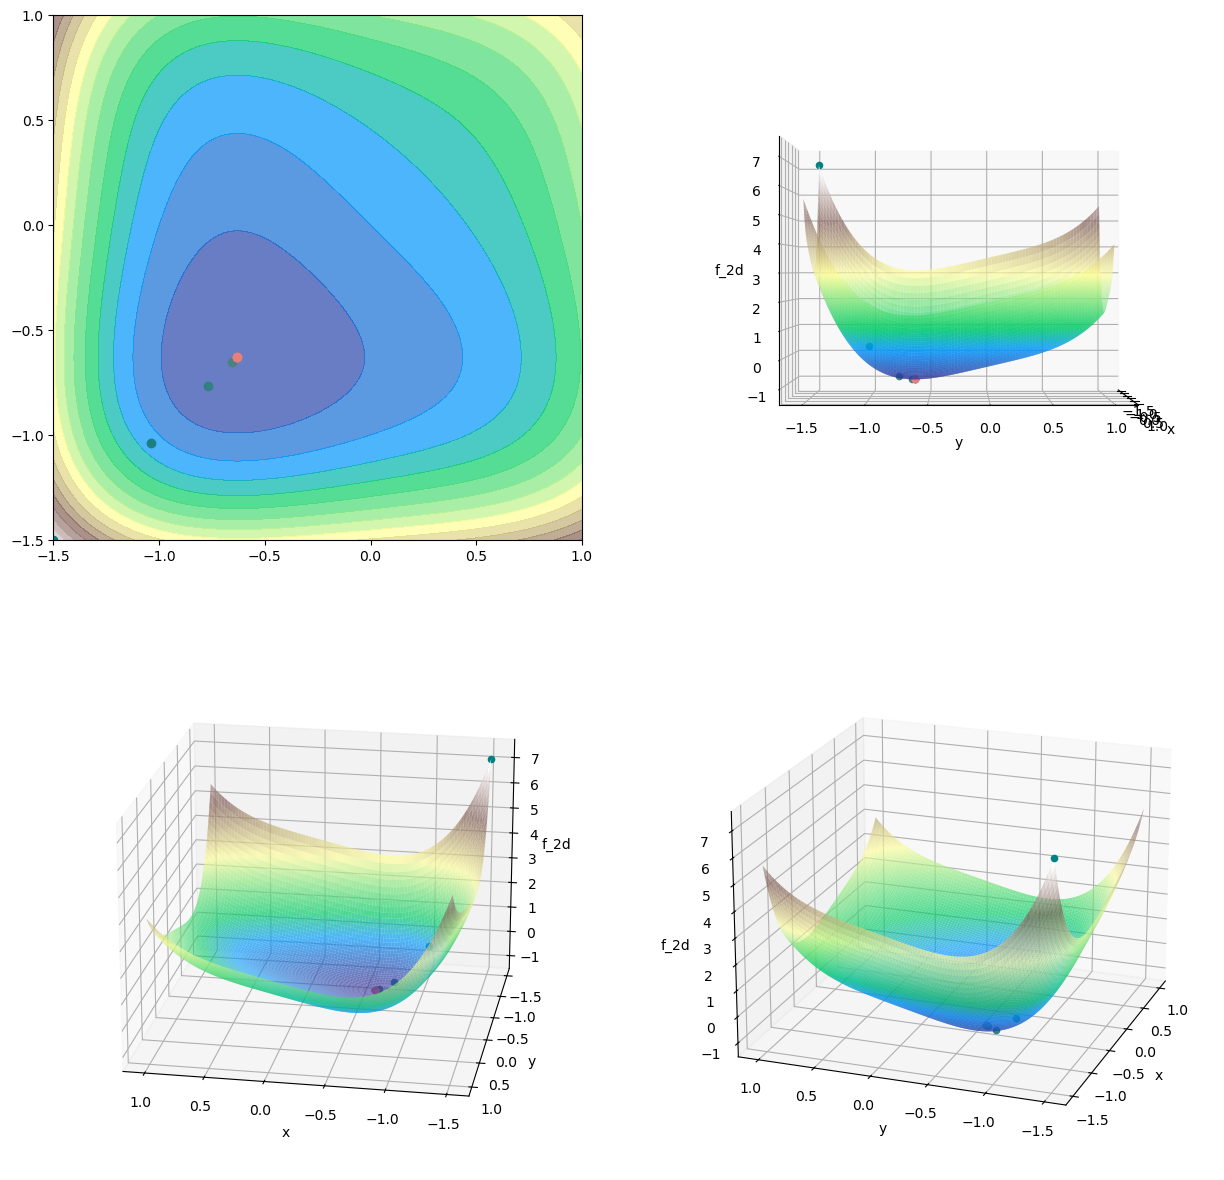

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(-1.5, 1, 100),
    np.linspace(-1.5, 1, 100)
    )
vals = f_2d(xx,yy)

f = plt.figure( figsize=(15,15))
gs = GridSpec(2, 2,figure = f)
axc = f.add_subplot(gs[0, 0])
axs_0 = f.add_subplot(gs[0, 1],  projection='3d')
axs_1 = f.add_subplot(gs[1, 0],  projection='3d')
axs_2 = f.add_subplot(gs[1, 1],  projection='3d')


cont = axc.contourf(xx,yy, vals, cmap='terrain', levels=18, linewidths=2, alpha=0.7)

surf = axs_0.plot_surface(xx,yy, vals, cmap='terrain', 
                antialiased=True,cstride=1,rstride=1, alpha=0.69)
axs_0.view_init(elev=0, azim=0, )
axs_0.set_xlabel('x', horizontalalignment='center')
axs_0.set_ylabel('y', horizontalalignment='center')
axs_0.set_zlabel('f_2d')

surf = axs_1.plot_surface(xx,yy, vals, cmap='terrain', 
                antialiased=True,cstride=1,rstride=1, alpha=0.69)
axs_1.view_init(elev=20, azim=100, )
axs_1.set_xlabel('x', horizontalalignment='center')
axs_1.set_ylabel('y', horizontalalignment='center')
axs_1.set_zlabel('f_2d')

surf = axs_2.plot_surface(xx,yy, vals, cmap='terrain', 
                antialiased=True,cstride=1,rstride=1, alpha=0.69)
axs_2.view_init(elev=20, azim=200, )
axs_2.set_xlabel('x', horizontalalignment='center')
axs_2.set_ylabel('y', horizontalalignment='center')
axs_2.set_zlabel('f_2d')

point = np.array([*start])

for i in range(num_iters):
    axc.scatter(point[0],point[1], c = [(i/num_iters, .5,.5)])
    axs_0.scatter(*point, f_2d(*point), c = [(i/num_iters, .5,.5)])
    axs_1.scatter(*point, f_2d(*point), c = [(i/num_iters, .5,.5)])
    axs_2.scatter(*point, f_2d(*point), c = [(i/num_iters, .5,.5)])
    #print(newtons_2d(*point), point, f_2d(*point))
    point -= newtons_2d(*point)

# Conclusion

If you have worked with neural networks before you might have see that this  method is way faster than a classical gradient descent, but the reasons why this is not used for optimizing neural networks is :

<ol>
    <li> Computation of an inverse Hessian matrix is extremely costly.</li>
    <li> Compared with a classical gradient descent where the gradient gets lower when the function starts to reach a low sloped areas in this method the subtracting factor sky rockets very soon when the starts to lower to the minimum of the function.</li>
</ol>